In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./Dataset/spam.csv", encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.sample(5)

,v1,v2
3152,ham,I tagged MY friends that you seemed to count a...
3316,ham,"No worries, hope photo shoot went well. have a..."
5396,ham,As in i want custom officer discount oh.
1423,ham,Lol great now im getting hungry.
1441,ham,Ya:)going for restaurant..


In [8]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [9]:
df.sample(5)

,target,text
2049,ham,How much is blackberry bold2 in nigeria.
4012,ham,Ok.
1033,ham,"OH MR SHEFFIELD! You wanna play THAT game, oka..."
3074,ham,Take us out shopping and Mark will distract Is...
4569,spam,Wanna have a laugh? Try CHIT-CHAT on your mobi...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target']) # changing ham to 0 and spam to 1

In [12]:
df.sample(5)

,target,text
1534,0,Remember on that day..
87,0,Yes I started to send requests to make it but ...
2558,0,"Some friends want me to drive em someplace, pr..."
1611,0,645
1357,0,Good afternoon loverboy ! How goes you day ? A...


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# duplicated
df.duplicated().sum()

np.int64(403)

In [15]:
df = df.drop_duplicates(keep="first")

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

## 2. EDA

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

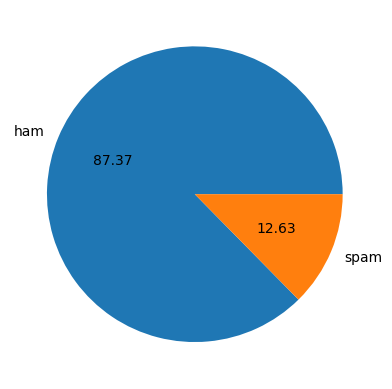

In [19]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aliha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_chars'] = df['text'].apply(len)

In [22]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aliha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aliha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
df['nums_word']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df['nums_sent']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_chars,nums_word,nums_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_chars', 'nums_word', 'nums_sent']].describe()

,num_chars,nums_word,nums_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target'] == 0][['num_chars','nums_word', 'nums_sent']].describe()

,num_chars,nums_word,nums_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target'] == 1][['num_chars','nums_word', 'nums_sent']].describe()

,num_chars,nums_word,nums_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

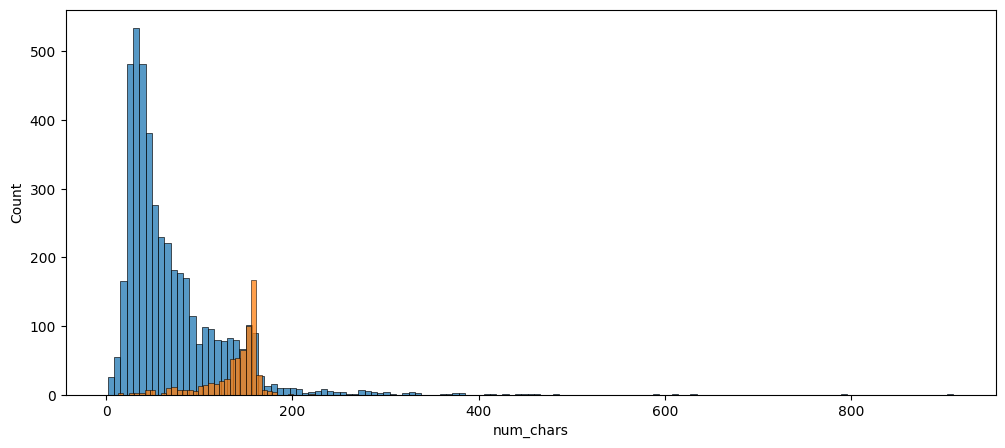

In [30]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] ==0]['num_chars'])
sns.histplot(df[df['target'] ==1]['num_chars'])

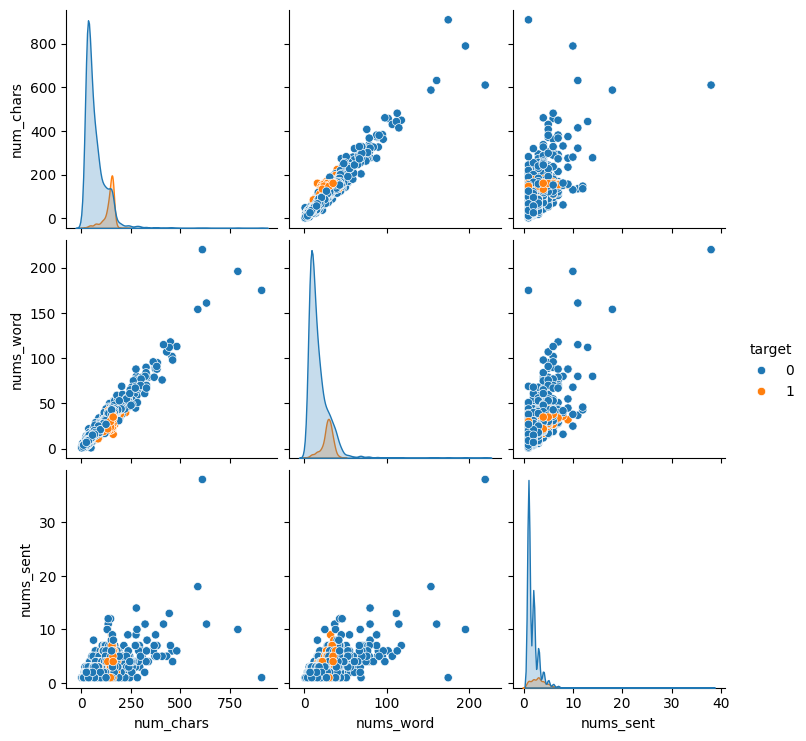

In [31]:
sns.pairplot(df, hue='target')

<Axes: >

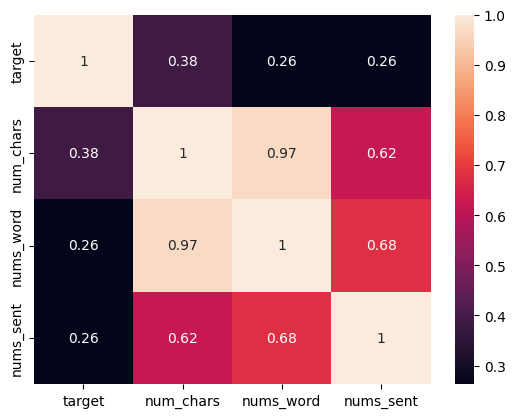

In [32]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

### DATA PREPROCESSING
- Lower case
- tokenization
- remove special chars
- remove stop words and puntuations
- stemming

In [33]:
import string
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aliha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
from nltk.stem.porter import PorterStemmer


In [35]:
def transform_text(text):
    text = text.lower() # lower
    text = nltk.word_tokenize(text) # tokenize
    
    y = []
    for i in text: # remove special chars
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    

In [36]:
transform_text("hello how are you %% ? are you good hassam dancing")

'hello good hassam danc'

In [37]:
df['trans_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_chars,nums_word,nums_sent,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
%pip install wordcloud

from wordcloud import WordCloud


Note: you may need to restart the kernel to use updated packages.


In [41]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

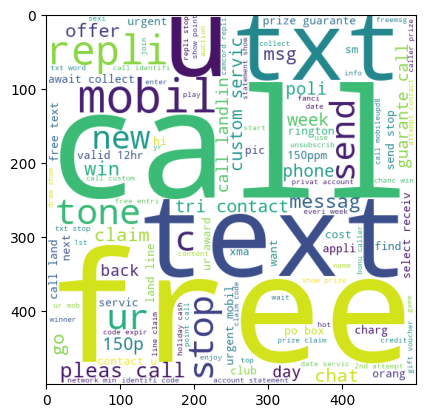

In [42]:
spam_wc = wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

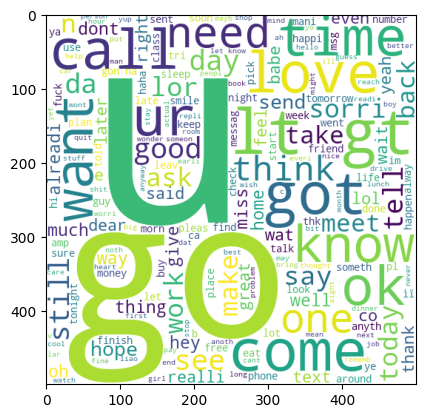

In [44]:
ham_wc = wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [45]:
spam_corpus = []
for msg in df[df['target'] == 1]['trans_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [50]:
ham_corpus = []
for msg in df[df['target'] == 0]['trans_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [46]:
from collections import Counter

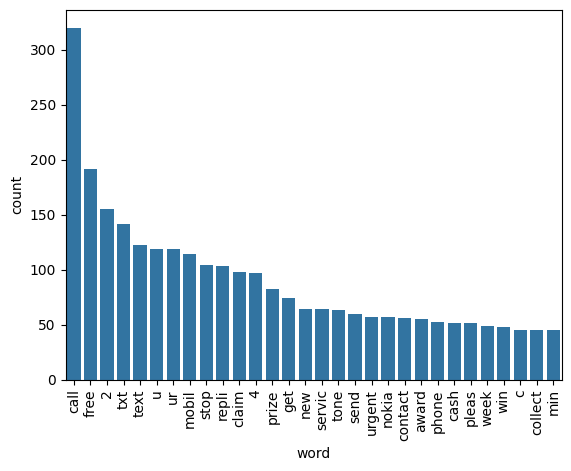

In [49]:
top_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=top_words_df)
plt.xticks(rotation=90)
plt.show()

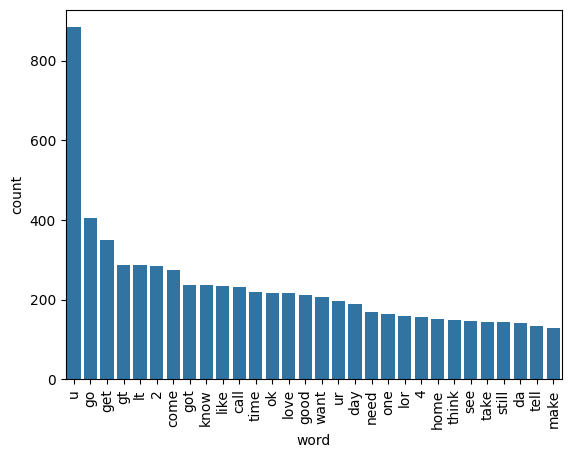

In [51]:
top_words_df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=top_words_df_ham)
plt.xticks(rotation=90)
plt.show()